In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import datetime
import time

import os, os.path
from os import listdir
from os.path import isfile, join

import re
# from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import sys

# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
import NASA_core as nc
import NASA_plot_core as npc

### Set up directories

In [2]:
data_dir = "/Users/hn/Documents/01_research_data/NASA/VI_TS/05_fifth_investigation/"
plot_dir = "/Users/hn/Documents/01_research_data/NASA/for_paper/plots/raw_statsPlots/"
os.makedirs(plot_dir, exist_ok=True)

In [3]:
file_names = [x for x in os.listdir(data_dir) if x.endswith(".csv")]
file_names = [x for x in file_names if "2017" in x]
np.sort(file_names).tolist()

['Eastern_WA_2017_07_variance_WrongYear.csv',
 'Eastern_WA_2017_07_variance_correctYear.csv',
 'Eastern_WA_2017_08_variance_WrongYear.csv',
 'Eastern_WA_2017_08_variance_correctYear.csv',
 'Sentinel_Correct2017_max_2017-01-01_2017-12-31.csv',
 'Sentinel_Correct2017_mean_2017-01-01_2017-12-31.csv',
 'Sentinel_Correct2017_p10_2017-01-01_2017-12-31.csv',
 'Sentinel_Correct2017_p90_2017-01-01_2017-12-31.csv']

In [4]:
Sentinel_Correct2017_mean = pd.read_csv(data_dir + \
                                        "Sentinel_Correct2017_mean_2017-01-01_2017-12-31.csv")

Sentinel_Correct2017_max = pd.read_csv(data_dir + \
                                       "Sentinel_Correct2017_max_2017-01-01_2017-12-31.csv")

Sentinel_Correct2017_p10 = pd.read_csv(data_dir + \
                                       "Sentinel_Correct2017_p10_2017-01-01_2017-12-31.csv")

Sentinel_Correct2017_p90 = pd.read_csv(data_dir + \
                                       "Sentinel_Correct2017_p90_2017-01-01_2017-12-31.csv")

In [5]:
ID_list = ['102309_WSDA_SF_2017', '104563_WSDA_SF_2017',
           '105429_WSDA_SF_2017'] # , '106054_WSDA_SF_2017'

In [6]:
indeks = "NDVI"

Sentinel_Correct2017_mean = Sentinel_Correct2017_mean[Sentinel_Correct2017_mean.ID.isin(ID_list)]
Sentinel_Correct2017_max = Sentinel_Correct2017_max[Sentinel_Correct2017_max.ID.isin(ID_list)]

Sentinel_Correct2017_mean = Sentinel_Correct2017_mean[Sentinel_Correct2017_mean[indeks].notna()]
Sentinel_Correct2017_max = Sentinel_Correct2017_max[Sentinel_Correct2017_max[indeks].notna()]
Sentinel_Correct2017_p10 = Sentinel_Correct2017_p10[Sentinel_Correct2017_p10[indeks].notna()]
Sentinel_Correct2017_p90 = Sentinel_Correct2017_p90[Sentinel_Correct2017_p90[indeks].notna()]


Sentinel_Correct2017_mean = nc.add_human_start_time_by_system_start_time(Sentinel_Correct2017_mean)
Sentinel_Correct2017_max = nc.add_human_start_time_by_system_start_time(Sentinel_Correct2017_max)
Sentinel_Correct2017_p10 = nc.add_human_start_time_by_system_start_time(Sentinel_Correct2017_p10)
Sentinel_Correct2017_p90 = nc.add_human_start_time_by_system_start_time(Sentinel_Correct2017_p90)

### Set the plotting style

In [7]:
size = 20
title_FontSize = 10
legend_FontSize = 8
tick_FontSize = 12
label_FontSize = 14

params = {'legend.fontsize': 15, # medium, large
          # 'figure.figsize': (6, 4),
          'axes.labelsize': size,
          'axes.titlesize': size*1.2,
          'xtick.labelsize': size, #  * 0.75
          'ytick.labelsize': size, #  * 0.75
          'axes.titlepad': 10}

#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'Palatino')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update(params)
# pylab.rcParams.update(params)
# plt.rc('text', usetex=True)

In [8]:
color_dict = {'max': '#d62728',
              'mean': 'dodgerblue', # '#8c564b'
              'p90': 'k', # '#ff7f0e'
              'p10': '#2ca02c'
             }

style_dict = {'max': 'dashed',
              'mean': 'solid', # '#8c564b'
              'p90': 'dotted', # '#ff7f0e'
              'p10': 'dashdot'
             }

In [9]:
# There is no/much data in Jan-Feb!!!!

In [10]:
march= "2017-03-01"
Sentinel_Correct2017_max = Sentinel_Correct2017_max[Sentinel_Correct2017_max.human_system_start_time>=march]
Sentinel_Correct2017_mean = Sentinel_Correct2017_mean[Sentinel_Correct2017_mean.human_system_start_time>=march]
Sentinel_Correct2017_p10 = Sentinel_Correct2017_p10[Sentinel_Correct2017_p10.human_system_start_time>=march]
Sentinel_Correct2017_p90 = Sentinel_Correct2017_p90[Sentinel_Correct2017_p90.human_system_start_time>=march]

nov= "2017-11-01"
Sentinel_Correct2017_max = Sentinel_Correct2017_max[Sentinel_Correct2017_max.human_system_start_time<=nov]
Sentinel_Correct2017_mean = Sentinel_Correct2017_mean[Sentinel_Correct2017_mean.human_system_start_time<=nov]
Sentinel_Correct2017_p10 = Sentinel_Correct2017_p10[Sentinel_Correct2017_p10.human_system_start_time<=nov]
Sentinel_Correct2017_p90 = Sentinel_Correct2017_p90[Sentinel_Correct2017_p90.human_system_start_time<=nov]

In [11]:
def plot_oneColumn_CropTitle(raw_dt, ax, idx="NDVI", _label = "raw", _color="red", lineStyle="-"):

    ax.plot(raw_dt['human_system_start_time'], raw_dt[idx], linestyle=lineStyle, 
            label=_label, linewidth=3.5, color=_color, alpha=0.8)

    titlee = " ".join(raw_dt.CropTyp.unique()[0].split(", ")[::-1])
    ax.set_title(titlee)
    ax.set_ylabel(idx) # , labelpad=20); # fontsize = label_FontSize,
    ax.tick_params(axis='y', which='major') #, labelsize = tick_FontSize)
    ax.tick_params(axis='x', which='major') #, labelsize = tick_FontSize) # 
    ax.legend(loc="upper right");
    # ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.set_ylim(-0.1, 1.1)

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


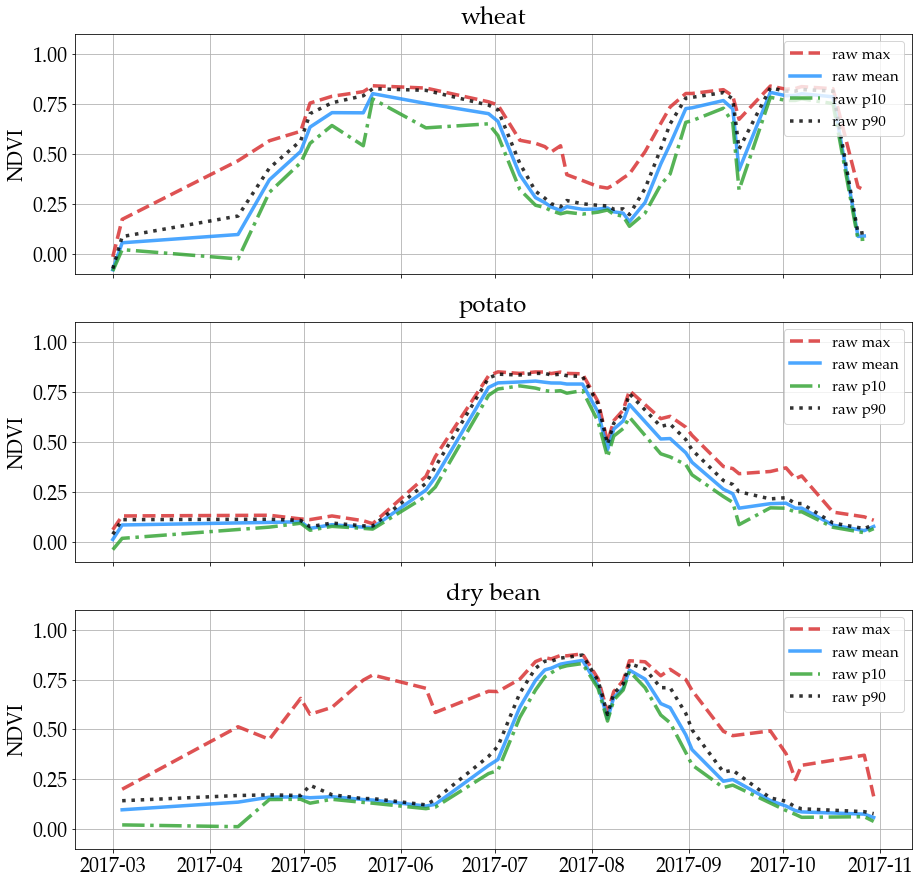

In [12]:
from IPython.display import clear_output
import pandas as pd
import time
%pylab inline --no-import-all
%load_ext autoreload

import NASA_core as nc
import NASA_plot_core as npc

%autoreload

import NASA_core as nc
import NASA_plot_core as npc

%pylab inline --no-import-all
%load_ext autoreload


fig, axs = plt.subplots(3, 1, figsize=(15, 15),
                       sharex='col', sharey='row',
                       # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.2, 'wspace': .05});

(ax1, ax2, ax3) = axs;
ax1.grid(True); ax2.grid(True)
ax3.grid(True); # ax4.grid(True)

################
################  Field 1
################

curr_raw = Sentinel_Correct2017_max[Sentinel_Correct2017_max.ID == ID_list[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax=ax1, idx=indeks, 
                         _label = "raw max", _color=color_dict["max"], lineStyle=style_dict["max"])

curr_raw = Sentinel_Correct2017_mean[Sentinel_Correct2017_mean.ID == ID_list[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax1, idx =indeks, 
                         _label = "raw mean", _color=color_dict["mean"], lineStyle=style_dict["mean"])

curr_raw = Sentinel_Correct2017_p10[Sentinel_Correct2017_p10.ID == ID_list[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax1, idx =indeks, 
                         _label = "raw p10", _color=color_dict["p10"], lineStyle=style_dict["p10"])

curr_raw = Sentinel_Correct2017_p90[Sentinel_Correct2017_p90.ID == ID_list[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax1, idx =indeks, 
                         _label = "raw p90", _color=color_dict["p90"], lineStyle=style_dict["p90"])

################
################  Field 2
################

curr_raw = Sentinel_Correct2017_max[Sentinel_Correct2017_max.ID == ID_list[1]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax2, idx =indeks, 
                         _label = "raw max", _color=color_dict["max"], lineStyle=style_dict["max"])

curr_raw = Sentinel_Correct2017_mean[Sentinel_Correct2017_mean.ID == ID_list[1]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax2, idx =indeks, 
                         _label = "raw mean", _color=color_dict["mean"], lineStyle=style_dict["mean"])

curr_raw = Sentinel_Correct2017_p10[Sentinel_Correct2017_p10.ID == ID_list[1]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax2, idx =indeks, 
                             _label = "raw p10", _color=color_dict["p10"], lineStyle=style_dict["p10"])

curr_raw = Sentinel_Correct2017_p90[Sentinel_Correct2017_p90.ID == ID_list[1]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax2, idx =indeks, 
                             _label = "raw p90", _color=color_dict["p90"], lineStyle=style_dict["p90"])

################
################  Field 3
################

curr_raw = Sentinel_Correct2017_max[Sentinel_Correct2017_max.ID == ID_list[2]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax3, idx =indeks, 
                             _label = "raw max", _color=color_dict["max"], lineStyle=style_dict["max"])

curr_raw = Sentinel_Correct2017_mean[Sentinel_Correct2017_mean.ID == ID_list[2]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax3, idx =indeks, 
                             _label = "raw mean", _color=color_dict["mean"], lineStyle=style_dict["mean"])

curr_raw = Sentinel_Correct2017_p10[Sentinel_Correct2017_p10.ID == ID_list[2]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax3, idx =indeks, 
                             _label = "raw p10", _color=color_dict["p10"], lineStyle=style_dict["p10"])

curr_raw = Sentinel_Correct2017_p90[Sentinel_Correct2017_p90.ID == ID_list[2]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax3, idx =indeks, 
                        _label = "raw p90", _color=color_dict["p90"], lineStyle=style_dict["p90"])

################
################  Field 4
################

# curr_raw = Sentinel_Correct2017_max[Sentinel_Correct2017_max.ID == ID_list[3]].copy()
# curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
# npc.plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax4, idx =indeks, _label = "raw max", 
# _color=color_dict["max"])

# curr_raw = Sentinel_Correct2017_mean[Sentinel_Correct2017_mean.ID == ID_list[3]].copy()
# curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
# npc.plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax4, idx =indeks, _label = "raw mean", 
# _color=color_dict["mean"])

# curr_raw = Sentinel_Correct2017_p10[Sentinel_Correct2017_p10.ID == ID_list[3]].copy()
# curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
# npc.plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax4, idx =indeks, _label = "raw p10", 
# _color=color_dict["p10"])

# curr_raw = Sentinel_Correct2017_p90[Sentinel_Correct2017_p90.ID == ID_list[3]].copy()
# curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
# npc.plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax4, idx =indeks, _label = "raw p90", _color="#ff7f0e")

################
################  Save
################
file_name = plot_dir + "stats_max_Mean_P10_90_" + indeks + ".pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);


# EVI

In [13]:
Sentinel_Correct2017_mean = pd.read_csv(data_dir + \
                                        "Sentinel_Correct2017_mean_2017-01-01_2017-12-31.csv")

Sentinel_Correct2017_max = pd.read_csv(data_dir + \
                                       "Sentinel_Correct2017_max_2017-01-01_2017-12-31.csv")

Sentinel_Correct2017_p10 = pd.read_csv(data_dir + \
                                       "Sentinel_Correct2017_p10_2017-01-01_2017-12-31.csv")

Sentinel_Correct2017_p90 = pd.read_csv(data_dir + \
                                       "Sentinel_Correct2017_p90_2017-01-01_2017-12-31.csv")

In [14]:
indeks = "EVI"

Sentinel_Correct2017_mean = Sentinel_Correct2017_mean[Sentinel_Correct2017_mean.ID.isin(ID_list)]
Sentinel_Correct2017_max = Sentinel_Correct2017_max[Sentinel_Correct2017_max.ID.isin(ID_list)]

Sentinel_Correct2017_mean = Sentinel_Correct2017_mean[Sentinel_Correct2017_mean[indeks].notna()]
Sentinel_Correct2017_max = Sentinel_Correct2017_max[Sentinel_Correct2017_max[indeks].notna()]
Sentinel_Correct2017_p10 = Sentinel_Correct2017_p10[Sentinel_Correct2017_p10[indeks].notna()]
Sentinel_Correct2017_p90 = Sentinel_Correct2017_p90[Sentinel_Correct2017_p90[indeks].notna()]

Sentinel_Correct2017_mean = nc.add_human_start_time_by_system_start_time(Sentinel_Correct2017_mean)
Sentinel_Correct2017_max = nc.add_human_start_time_by_system_start_time(Sentinel_Correct2017_max)

Sentinel_Correct2017_p10 = nc.add_human_start_time_by_system_start_time(Sentinel_Correct2017_p10)
Sentinel_Correct2017_p90 = nc.add_human_start_time_by_system_start_time(Sentinel_Correct2017_p90)

In [15]:
march= "2017-03-01"
Sentinel_Correct2017_max = Sentinel_Correct2017_max[Sentinel_Correct2017_max.human_system_start_time>=march]
Sentinel_Correct2017_mean = Sentinel_Correct2017_mean[Sentinel_Correct2017_mean.human_system_start_time>=march]
Sentinel_Correct2017_p10 = Sentinel_Correct2017_p10[Sentinel_Correct2017_p10.human_system_start_time>=march]
Sentinel_Correct2017_p90 = Sentinel_Correct2017_p90[Sentinel_Correct2017_p90.human_system_start_time>=march]

nov= "2017-11-01"
Sentinel_Correct2017_max = Sentinel_Correct2017_max[Sentinel_Correct2017_max.human_system_start_time<=nov]
Sentinel_Correct2017_mean = Sentinel_Correct2017_mean[Sentinel_Correct2017_mean.human_system_start_time<=nov]
Sentinel_Correct2017_p10 = Sentinel_Correct2017_p10[Sentinel_Correct2017_p10.human_system_start_time<=nov]
Sentinel_Correct2017_p90 = Sentinel_Correct2017_p90[Sentinel_Correct2017_p90.human_system_start_time<=nov]

In [16]:
# EVI violates the boundary. Set them to 1.1

In [17]:
Sentinel_Correct2017_max.loc[Sentinel_Correct2017_max.EVI>1, "EVI"]=1.05
Sentinel_Correct2017_mean.loc[Sentinel_Correct2017_mean.EVI>1, "EVI"]=1.05
Sentinel_Correct2017_p10.loc[Sentinel_Correct2017_p10.EVI>1, "EVI"]=1.05
Sentinel_Correct2017_p90.loc[Sentinel_Correct2017_p90.EVI>1, "EVI"]=1.05

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


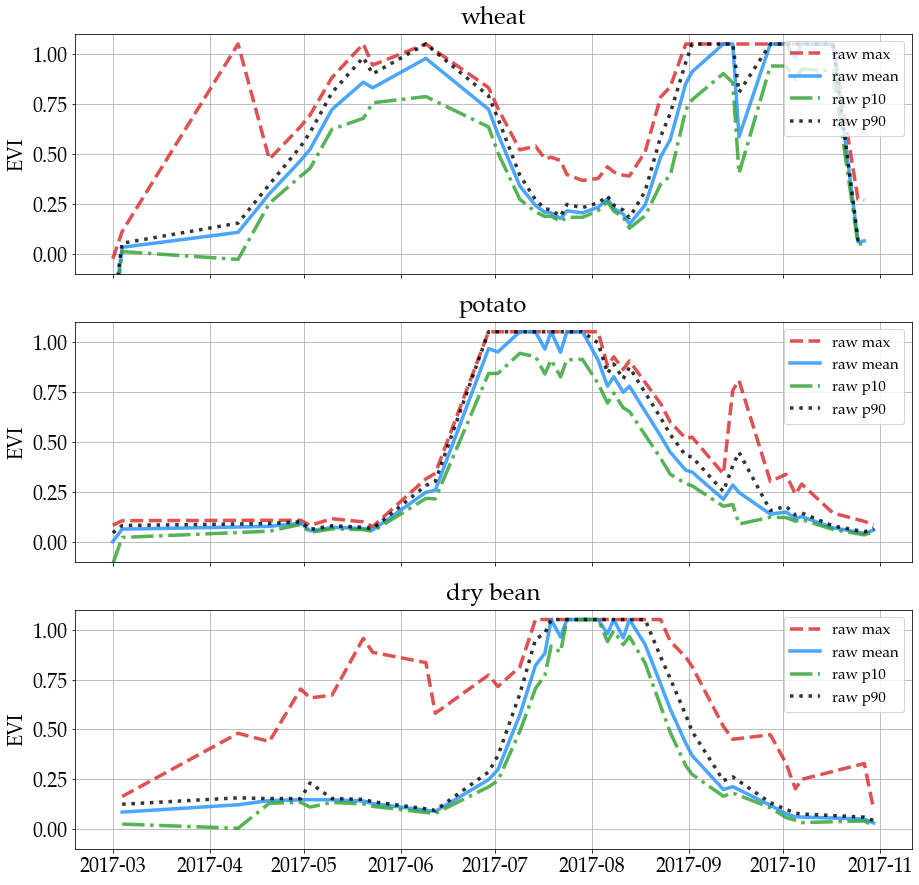

In [18]:
from IPython.display import clear_output

%pylab inline --no-import-all
%load_ext autoreload

import NASA_core as nc
import NASA_plot_core as npc

%autoreload

fig, axs = plt.subplots(3, 1, figsize=(20, 12),
                       sharex='col', sharey='row',
                       # sharex=True, sharey=True,
                       gridspec_kw={'hspace': 0.2, 'wspace': .05});

(ax1, ax2, ax3) = axs;
ax1.grid(True); ax2.grid(True)
ax3.grid(True); # ax4.grid(True)

################
################  Field 1
################

curr_raw = Sentinel_Correct2017_max[Sentinel_Correct2017_max.ID == ID_list[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax=ax1, idx=indeks, 
                         _label = "raw max", _color=color_dict["max"], lineStyle=style_dict["max"])

curr_raw = Sentinel_Correct2017_mean[Sentinel_Correct2017_mean.ID == ID_list[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax1, idx =indeks, 
                             _label = "raw mean", _color=color_dict["mean"], lineStyle=style_dict["mean"])

curr_raw = Sentinel_Correct2017_p10[Sentinel_Correct2017_p10.ID == ID_list[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax1, idx =indeks, 
                             _label = "raw p10", _color=color_dict["p10"], lineStyle=style_dict["p10"])

curr_raw = Sentinel_Correct2017_p90[Sentinel_Correct2017_p90.ID == ID_list[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax1, idx =indeks, 
                         _label = "raw p90", _color=color_dict["p90"], lineStyle=style_dict["p90"])

################
################  Field 2, axis 2
################

curr_raw = Sentinel_Correct2017_max[Sentinel_Correct2017_max.ID == ID_list[1]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax2, idx =indeks, 
                             _label = "raw max", _color=color_dict["max"], lineStyle=style_dict["max"])

curr_raw = Sentinel_Correct2017_mean[Sentinel_Correct2017_mean.ID == ID_list[1]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax2, idx =indeks, 
                         _label = "raw mean", _color=color_dict["mean"], lineStyle=style_dict["mean"])

curr_raw = Sentinel_Correct2017_p10[Sentinel_Correct2017_p10.ID == ID_list[1]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax2, idx =indeks, 
                             _label = "raw p10", _color=color_dict["p10"], lineStyle=style_dict["p10"])

curr_raw = Sentinel_Correct2017_p90[Sentinel_Correct2017_p90.ID == ID_list[1]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax2, idx =indeks, 
                         _label = "raw p90", _color=color_dict["p90"], lineStyle=style_dict["p90"])

################
################  Field 3
################

curr_raw = Sentinel_Correct2017_max[Sentinel_Correct2017_max.ID == ID_list[2]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax3, idx =indeks, 
                             _label = "raw max", _color=color_dict["max"], lineStyle=style_dict["max"])

curr_raw = Sentinel_Correct2017_mean[Sentinel_Correct2017_mean.ID == ID_list[2]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax3, idx =indeks, 
                             _label = "raw mean", _color=color_dict["mean"], lineStyle=style_dict["mean"])

curr_raw = Sentinel_Correct2017_p10[Sentinel_Correct2017_p10.ID == ID_list[2]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax3, idx =indeks, 
                             _label = "raw p10", _color=color_dict["p10"], lineStyle=style_dict["p10"])

curr_raw = Sentinel_Correct2017_p90[Sentinel_Correct2017_p90.ID == ID_list[2]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax3, idx =indeks, 
                         _label = "raw p90", _color=color_dict["p90"], lineStyle=style_dict["p90"])

################
################  Field 4
################

# curr_raw = Sentinel_Correct2017_max[Sentinel_Correct2017_max.ID == ID_list[3]].copy()
# curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
# npc.plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax4, idx =indeks, _label = "raw max", 
# _color=color_dict["max"])

# curr_raw = Sentinel_Correct2017_mean[Sentinel_Correct2017_mean.ID == ID_list[3]].copy()
# curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
# npc.plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax4, idx =indeks, _label = "raw mean",
# _color=color_dict["mean"])

# curr_raw = Sentinel_Correct2017_p10[Sentinel_Correct2017_p10.ID == ID_list[3]].copy()
# curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
# npc.plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax4, idx =indeks, _label = "raw p10", 
# _color=color_dict["p10"])

# curr_raw = Sentinel_Correct2017_p90[Sentinel_Correct2017_p90.ID == ID_list[3]].copy()
# curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
# npc.plot_oneColumn_CropTitle(raw_dt = curr_raw, ax = ax4, idx =indeks, _label = "raw p90", 
#                              _color="color_dict["p90"]")

################
################  Save
################
plot_dir = "/Users/hn/Documents/01_research_data/NASA/for_paper/plots/raw_statsPlots/"
os.makedirs(plot_dir, exist_ok=True)

file_name = plot_dir + "stats_max_Mean_P10_90_" + indeks + ".pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);
